In [281]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [282]:
import plotly.graph_objects as go

In [283]:
df= pd.read_csv('DataAnalyst.csv')

In [284]:
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True


## Data Cleaning

In [285]:
df.drop('Unnamed: 0',axis=1,inplace=True) #Removing the redundant column.

In [286]:
df['Salary Estimate']=df['Salary Estimate'].apply(lambda x:x.split(' ')[0])

#### Check for missing values

In [288]:
df.isna().sum()

Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         1
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
Easy Apply           0
dtype: int64

In [289]:
df.dropna(inplace=True)

In [290]:
#df.isna().sum()

In [291]:
df['Company Name']=df['Company Name'].apply(lambda x:x.split('\n')[0])

In [292]:
df.sample(10)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
979,Business Data Analyst,$53K-$94K,What We Are Looking For\n\nNEP is currently se...,4.6,National Education Partners,"Scottsdale, AZ","Scottsdale, AZ",201 to 500 employees,2019,Company - Private,Colleges & Universities,Education,$100 to $500 million (USD),-1,-1
862,Lead Data Analyst,$97K-$129K,Position Purpose: Responsible for analytical d...,2.2,IlliniCare Health Plan,"Chicago, IL","Saint Louis, MO",1001 to 5000 employees,-1,Company - Public,-1,-1,Unknown / Non-Applicable,-1,-1
626,"Sr. Analyst, Data",$35K-$45K,Job Description\nJob Summary\nWorking within E...,3.1,Molina Healthcare,"Long Beach, CA","Long Beach, CA",10000+ employees,1980,Company - Public,Insurance Carriers,Insurance,$10+ billion (USD),-1,-1
1796,Operations Data Analyst,$50K-$86K,"Req Id: 2756\nJob location: Charlotte, NC, US,...",3.8,Brighthouse Financial,"Charlotte, NC","Charlotte, NC",1001 to 5000 employees,2017,Company - Public,Insurance Carriers,Insurance,Unknown / Non-Applicable,-1,-1
848,"ERP Data Migration Analyst in Glenview, IL at ...",$97K-$129K,Job Description\nERP Data Migration Analyst,3.2,Signode,"Glenview, IL","Glenview, IL",5001 to 10000 employees,1913,Subsidiary or Business Segment,Industrial Manufacturing,Manufacturing,$2 to $5 billion (USD),-1,-1
1909,Data Analyst,$57K-$104K,Company Description:\nAngaza is a venture-back...,4.6,Angaza,"San Francisco, CA","San Francisco, CA",51 to 200 employees,2010,Company - Private,Enterprise Software & Network Solutions,Information Technology,Unknown / Non-Applicable,-1,-1
761,Data Analyst,$73K-$82K,Data Analyst**job details:**+ location:Downers...,3.7,Randstad,"Downers Grove, IL","Atlanta, GA",1001 to 5000 employees,-1,Subsidiary or Business Segment,Staffing & Outsourcing,Business Services,Unknown / Non-Applicable,-1,-1
1645,Data Analyst,$42K-$76K,Zynga is a leading developer of the world’s mo...,4.1,Zynga,"Austin, TX","San Francisco, CA",1001 to 5000 employees,2007,Company - Public,Video Games,Media,$500 million to $1 billion (USD),-1,-1
2058,Data and Policy Analyst - Writer/Coordinator,$47K-$74K,"Job Description\n\nAt Acumen, LLC / The SPHERE...",3.2,Acumen,"Burlingame, CA","Burlingame, CA",201 to 500 employees,1996,Company - Private,Federal Agencies,Government,$10 to $25 million (USD),Acumen,-1
731,Data Analyst,$60K-$66K,Please make sure to read the job posting in it...,4.0,University of Chicago,"Chicago, IL","Chicago, IL",10000+ employees,1890,College / University,Colleges & Universities,Education,$2 to $5 billion (USD),-1,-1


There are some columns containing some values as -1 and -1.0. These are kind of null values. We need to clean this.

In [293]:
#df

In [294]:
df=df.replace(-1,np.nan)
df=df.replace('-1',np.nan)
df=df.replace(-1.0,np.nan)


In [295]:
df.isna().sum()*100/len(df) #percentage of missing values

Job Title             0.000000
Salary Estimate       0.044405
Job Description       0.000000
Rating               12.033748
Company Name          0.000000
Location              0.000000
Headquarters          7.593250
Size                  7.193606
Founded              29.262877
Type of ownership     7.193606
Industry             15.630551
Sector               15.630551
Revenue               7.193606
Competitors          76.865009
Easy Apply           96.447602
dtype: float64

In [296]:
df.dtypes

Job Title             object
Salary Estimate       object
Job Description       object
Rating               float64
Company Name          object
Location              object
Headquarters          object
Size                  object
Founded              float64
Type of ownership     object
Industry              object
Sector                object
Revenue               object
Competitors           object
Easy Apply            object
dtype: object

## Current Openings

In [297]:
df['Easy Apply'].unique()

array(['True', nan], dtype=object)

Most companies have null values in easy apply because they are not hiring.

In [298]:
df['Easy Apply'].fillna(False,inplace=True)

In [299]:
df['Easy Apply']=df['Easy Apply'].astype('bool')

In [300]:
vacancies=df[df['Easy Apply']==True].groupby('Company Name')['Easy Apply'].count().reset_index().sort_values('Easy Apply',ascending=False)

In [301]:
vacancies=vacancies[vacancies['Easy Apply']>1]

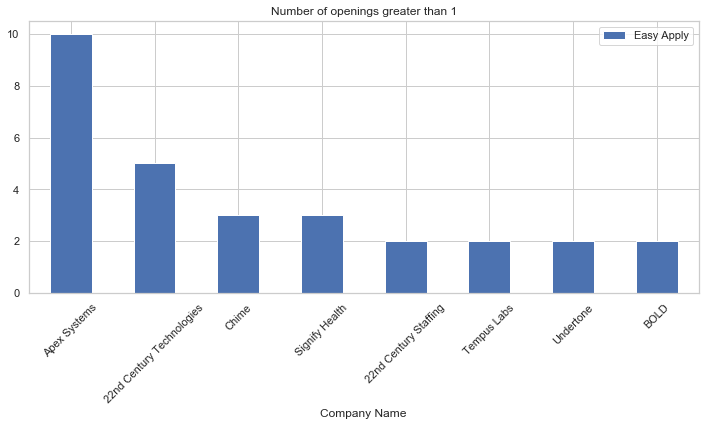

In [410]:
sns.set(style='whitegrid')
vacancies.plot(kind='bar',x='Company Name',y='Easy Apply',figsize=(12,5),rot=45,title='Number of openings greater than 1')

In [ ]:
It can be observed that company 'Apex Systems' has the highest number of current openings. 

In [303]:
opening_by_title=df[df['Easy Apply']==True].groupby('Job Title')['Easy Apply'].count().reset_index().sort_values('Easy Apply',ascending=False)

In [304]:
opening_by_title=opening_by_title[opening_by_title['Easy Apply']>1]

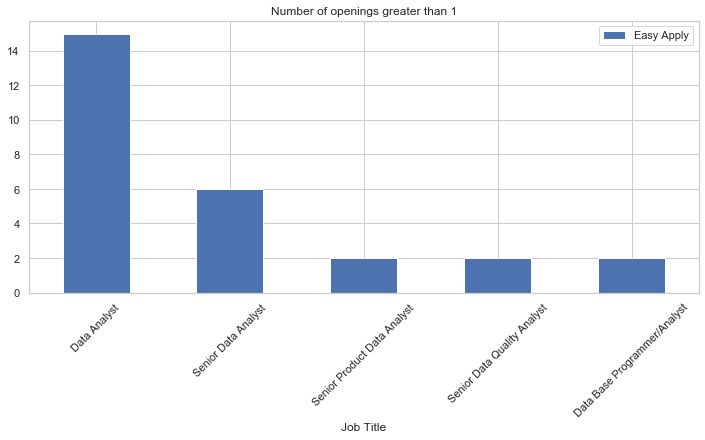

In [411]:
opening_by_title.plot(kind='bar',x='Job Title',y='Easy Apply',figsize=(12,5),rot=45,title='Number of openings greater than 1')

Jobs with title Data Analyst have highest number of current openings.

## Salary Distribution

In [306]:
df['min. salary'],df['max. salary']=df['Salary Estimate'].str.split('-').str

C:\Users\dell\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Columnar iteration over characters will be deprecated in future releases.



In [307]:
df['min. salary']=df['min. salary'].str.strip('$').str.strip('K').fillna(0).astype('int')

In [308]:
df['max. salary']=df['max. salary'].str.strip('$').str.strip('K').fillna(0).astype('int')

In [309]:
df.drop('Salary Estimate',inplace=True, axis=1)

In [310]:
df['Job Title'],df['Department']=df['Job Title'].str.split(',',1).str

C:\Users\dell\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Columnar iteration over characters will be deprecated in future releases.



In [311]:
df['Job Title'].unique()

array(['Data Analyst', 'Quality Data Analyst', 'Senior Data Analyst', ...,
       'RQS - IHHA - 201900004460 -1q Data Security Analyst',
       'Senior Data Analyst (Corporate Audit)',
       'Senior Quality Data Analyst'], dtype=object)

In [312]:
df.sort_values('min. salary',ascending=False)[['Company Name','Job Title','min. salary']]

,Company Name,Job Title,min. salary
714,TikTok,Sr. Data Analyst — US Safety,113
700,Blue Shield of California,Data Analyst - Health,113
715,Mercury Insurance Group,Data Analyst - Marketing Analytics,113
713,KLM Careers,Radar Telemetry Data Analyst - RT,113
712,PIH Health,QM DATA ANALYST II,113
...,...,...,...
1337,Hilltop Holdings,Data Analyst,24
1341,Capgemini,DALLAS Campus Recruiting 2018 - I&D - Data Ana...,24
1338,Texas Scottish Rite Hospital for Children,Performance Improvement Data Analyst,24
1339,"Staffigo Technical Services, LLC",Junior Data Analyst,24


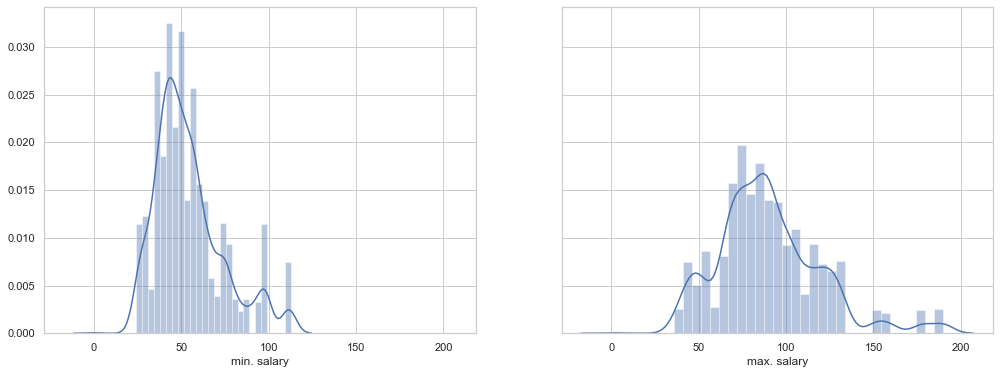

In [412]:
fig,axes= plt.subplots(1,2,figsize=(17,6),sharex=True,sharey=True)
sns.distplot(df['min. salary'],ax=axes[0])
sns.distplot(df['max. salary'],ax=axes[1])

Most of the companies have their min. salaries in the range 40-60K and max. salaries around 85K.

In [314]:
df[df['max. salary']==190][['Company Name','Job Title','Rating']].sort_values('Rating',ascending=False) #Best companines in terms of max. salary offerred in order of decreasing ratings 

,Company Name,Job Title,Rating
1484,Moveworks,AI Insights Data Analyst,5.0
1469,NVIDIA,Senior HR Data Analyst,4.6
1468,OSI Engineering,Data Analyst,4.5
1486,Nuro,Data Analyst,4.4
1485,Ursus,Data Analyst (SQL,4.4
1489,BayOne Solutions,Data Analyst,4.1
1471,LeanData,Data Analyst,4.0
1490,Zipongo,Data Analyst,4.0
1478,Connor Group,Data Analyst,4.0
1481,Cognoa,Tableau Data Analyst Intern,4.0


## Ratings

In [315]:
df[df['Rating']==5]['Company Name'] #Best companines in terms of ratings

26                              Duolingo
42                      Whip Media Group
78                   Mulberry Technology
81                             EDO, Inc.
106     Crossfire Consulting Corporation
                      ...               
2206                  Goldstone Partners
2207                 xentity corporation
2220                     Georgia IT Inc.
2221    Staffigo Technical Services, LLC
2226    Staffigo Technical Services, LLC
Name: Company Name, Length: 131, dtype: object

Text(0, 0.5, 'No. of companies')

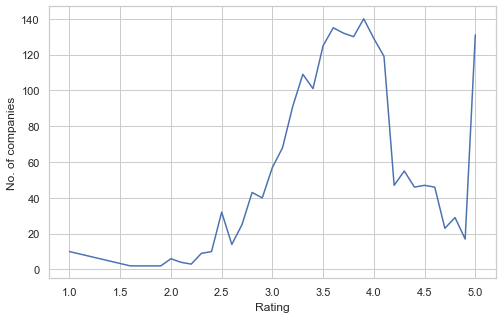

In [409]:
plt.figure(figsize=(8,5))
plt.plot(df.groupby('Rating')['Company Name'].count())
plt.xlabel('Rating')
plt.ylabel('No. of companies')

Most of the companies are having ratings around 3.9.

In [317]:
#df.head()

## Jobs based on location

In [318]:
df['Location_State']=df['Location'].apply(lambda x:x.split(', ')[1])

In [319]:
df.drop('Location',axis=1,inplace=True)

In [320]:
most_jobs_at=df[df['Easy Apply']==True].groupby('Location_State')['Company Name'].count().reset_index().sort_values('Company Name',ascending=False)

Text(0, 0.5, 'no. of current openings')

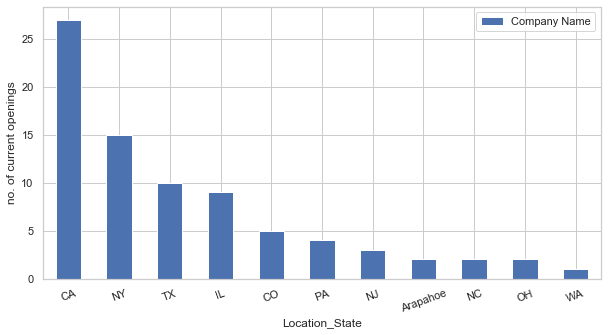

In [408]:
most_jobs_at.plot(x='Location_State',y='Company Name',kind='bar',rot=20,figsize=(10,5))
plt.ylabel('no. of current openings')

We can see that highest number of current openings are there in CA.

In [322]:
sal_by_loc=df.groupby('Location_State')[['min. salary','max. salary']].mean().sort_values('max. salary',ascending=False)

In [351]:
sal_by_loc


,min. salary,max. salary
Location_State,,
CA,66.311502,110.552716
AZ,47.082474,94.494845
NJ,55.767442,90.232558
Arapahoe,55.000000,89.500000
NY,53.797101,89.026087
CO,58.215909,89.022727
IL,67.792683,88.829268
VA,45.250000,85.125000
NC,50.966292,85.078652


In [356]:
fig=go.Figure()
fig.add_trace(go.Bar(x=sal_by_loc.index,y=sal_by_loc['min. salary'],name='avg.  min. salary'))
fig.add_trace(go.Bar(x=sal_by_loc.index,y=sal_by_loc['max. salary'],name='avg. max. salary'))
fig.update_layout(title='avg. min. and max. salaries by location',barmode='stack')

From this plot, we can observe that highest avg. max. salary is given in the companies located in CA while the lowest avg. salaries are given in the companies of UT.

In [325]:
rating_by_loc=df.groupby('Location_State')[['Rating']].mean().sort_values('Rating',ascending=False)

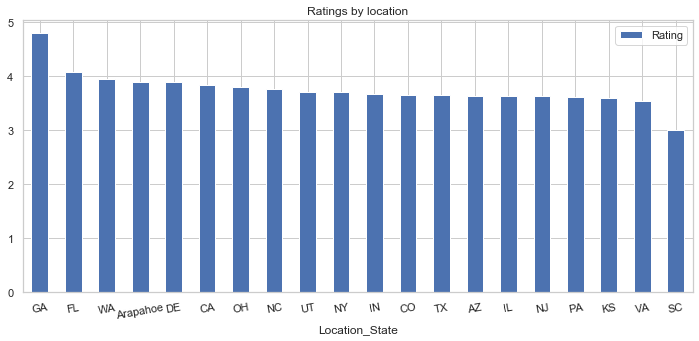

In [407]:
rating_by_loc.plot(kind='bar',figsize=(12,5),rot=10,title='Ratings by location')

We can observe that avg. rating is highest in the companies of GA while lowest in that of SC.

## Employee Size

In [327]:
df['Size']=df['Size'].astype(str).apply(lambda x:x.strip('employees'))
df['Size']

0         201 to 500 
1             10000+ 
2       1001 to 5000 
3         201 to 500 
4        501 to 1000 
            ...      
2248       51 to 200 
2249          10000+ 
2250              nan
2251      201 to 500 
2252          10000+ 
Name: Size, Length: 2252, dtype: object

In [328]:
df['Size']=df['Size'].replace('nan','Unknown')

In [329]:
size=df.groupby('Size')['Company Name'].count().reset_index()

In [330]:
size=size.rename(columns={'Company Name':'No. of companies'}).sort_values('No. of companies',ascending=False)

[Text(0, 0, '51 to 200 '),
 Text(0, 0, '10000+ '),
 Text(0, 0, '1001 to 5000 '),
 Text(0, 0, '1 to 50 '),
 Text(0, 0, '201 to 500 '),
 Text(0, 0, '501 to 1000 '),
 Text(0, 0, 'Unknown'),
 Text(0, 0, '5001 to 10000 ')]

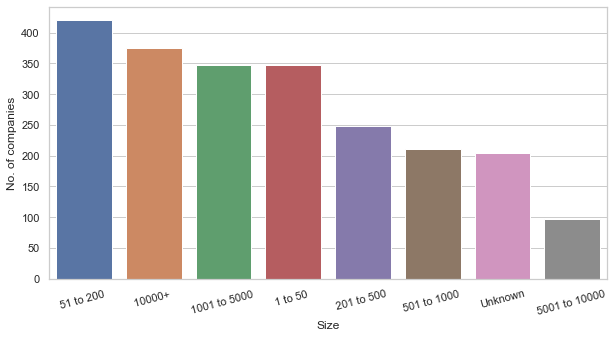

In [406]:
plt.figure(figsize=(10,5))
chart=sns.barplot(x='Size',y='No. of companies', data=size)
chart.set_xticklabels(chart.get_xticklabels(),rotation=15)

Most of the companies are having 51 to 200 employees.

## Word clouds

In [332]:
from wordcloud import WordCloud

In [333]:
wc=WordCloud(width=1600,height=800,max_words=1000).generate(' '.join(df['Job Description']))

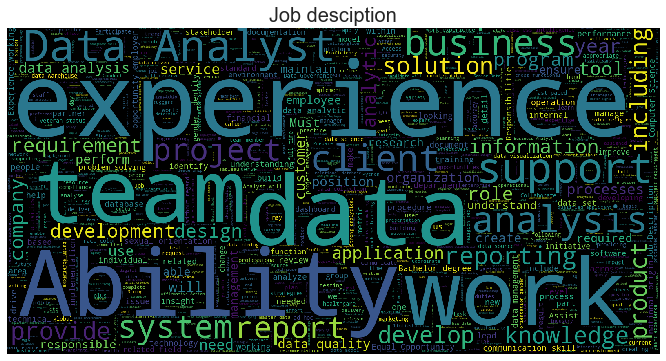

In [334]:
plt.figure(figsize=(12,6))
plt.axis('off')
plt.title('Job desciption',fontsize=20)
plt.imshow(wc)

In [335]:
wc=WordCloud(width=1600,height=800,max_words=1000).generate(' '.join(df['Job Title']))

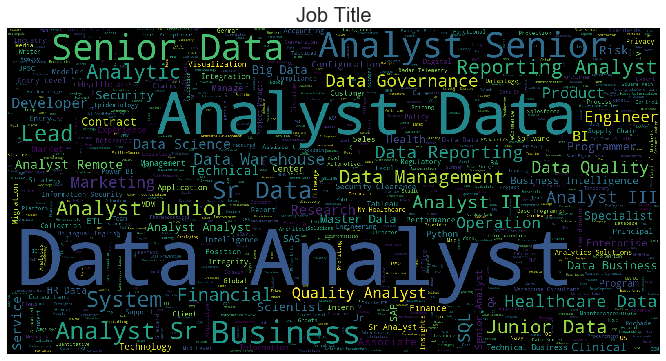

In [336]:
plt.figure(figsize=(12,6))
plt.axis('off')
plt.title('Job Title',fontsize=20)
plt.imshow(wc)

## Industries by avg. min. and max. salaries

In [341]:
ind=df.groupby('Industry')[['min. salary','max. salary']].mean().reset_index()
ind

,Industry,min. salary,max. salary
0,Accounting,59.153846,93.435897
1,Advertising & Marketing,53.176471,92.019608
2,Aerospace & Defense,51.954545,85.045455
3,Architectural & Engineering Services,52.461538,92.153846
4,Audiovisual,24.000000,48.000000
...,...,...,...
83,Utilities,67.000000,99.500000
84,Vehicle Dealers,39.000000,60.333333
85,Venture Capital & Private Equity,62.833333,94.166667
86,Video Games,50.800000,85.950000


In [405]:
plt.figure(figsize=(7,4))
fig=go.Figure()
fig.add_trace(go.Bar(x=ind['Industry'],y=ind['min. salary'],name='avg. min. salary'))
fig.add_trace(go.Bar(x=ind['Industry'],y=ind['max. salary'],name='avg. max. salary'))
fig.update_layout(title='Industries by avg. min. and avg. max. salary',barmode='stack')              

<Figure size 504x288 with 0 Axes>

Drug & Health Stores industry has the highest avg. max. salary while Audiovisual industry has the lowests avg. min. salary.

## Revenue

In [366]:
rating_by_rev=df.groupby('Revenue')['Rating'].mean().reset_index()
rating_by_rev

,Revenue,Rating
0,$1 to $2 billion (USD),3.752874
1,$1 to $5 million (USD),3.834653
2,$10 to $25 million (USD),3.751145
3,$10+ billion (USD),3.657143
4,$100 to $500 million (USD),3.605505
5,$2 to $5 billion (USD),3.533333
6,$25 to $50 million (USD),3.716364
7,$5 to $10 billion (USD),3.480357
8,$5 to $10 million (USD),3.766197
9,$50 to $100 million (USD),4.084925


Text(0.5, 1.0, 'Revenues with the company ratings')

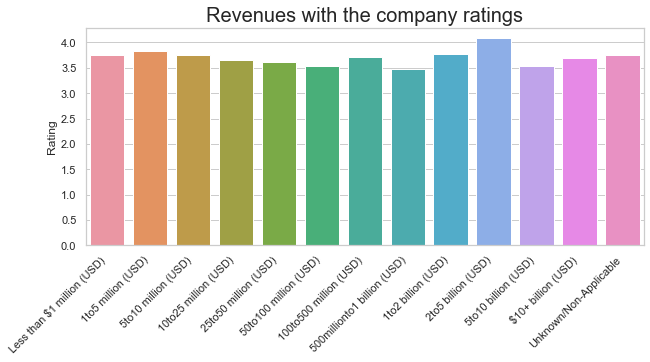

In [404]:
plt.figure(figsize=(10,4))
rev=['Less than $1 million (USD)','1to5 million (USD)','5to10 million (USD)','10to25 million (USD)','25to50 million (USD)','50to100 million (USD)','100to500 million (USD)','500millionto1 billion (USD)','1to2 billion (USD)','2to5 billion (USD)','5to10 billion (USD)','$10+ billion (USD)','Unknown/Non-Applicable']
chart=sns.barplot(x=rev,y='Rating',data=rating_by_rev)
chart.set_xticklabels(chart.get_xticklabels(),horizontalalignment='right',rotation=45)
plt.title('Revenues with the company ratings',fontsize=20)

We can see that companies with revenues 2to5 billion (USD) have highest avg. rating.

## Type of ownership

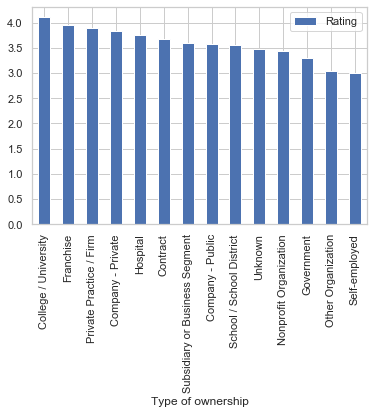

In [402]:
df.groupby('Type of ownership')['Rating'].mean().reset_index().sort_values('Rating',ascending=False).plot(x='Type of ownership',y='Rating',kind='bar')


It seems that College/University has the highest avg. rating.